<a href="https://colab.research.google.com/github/Chirag099/EDA-on-SuicideRates/blob/main/EDA_On_Suicide_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
#Loading the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
#Loading the DataSet
suicide = pd.read_csv('master.csv')

In [128]:
#Exploring the Data
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [129]:
suicide.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

There are Six Generations
(1) GI Generation (Greatest Generation): 1910-1924
(2) Silent: 1925-1945
(3) Boomers: 1946-1964
(4) Generation X: 1965-1979
(5) Millenials: 1980-1984
(6) Generation Z: 1995-2012


In [130]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

So, The columns are as follows: 1.) Country
2.) Year
3.) Sex
4.) Age
5.) Suicides_no = number of suicides committed in the specificed year and country.
6.) Population
7.) suicides/100 k population
8.) HDI(Human Development Index) for Year
9.) GDP_for_year
10.) GDP_per_capita

In [131]:
#Cleaning the Data
suicide.shape

(27820, 12)

In [132]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [133]:
suicide[' gdp_for_year ($) '] = suicide[' gdp_for_year ($) '].str.replace(',','').astype(int)

In [134]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [135]:
#Verifying For Null Values
suicide.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [136]:
#counting all the null values and adding 1 everytime to the sum it's true that the value is null
suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [137]:
#There are way too many null values for HDI and also it's not a important feature
# therefore we will eliminate it .
del suicide['HDI for year']

In [138]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [139]:
#How many countries are studied in this dataset
len(suicide.country.unique())

101

In [175]:
suicide.drop('year',axis=1).describe()

,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [176]:
#Number of suicides per country
suicide.groupby('country').suicides_no.sum().sort_values(ascending=False)

country
Russian Federation       1209742
United States            1034013
Japan                     806902
France                    329127
Ukraine                   319950
                          ...   
Maldives                      20
Antigua and Barbuda           11
San Marino                     4
Saint Kitts and Nevis          0
Dominica                       0
Name: suicides_no, Length: 101, dtype: int64

In [177]:
total_suicide = pd.DataFrame(suicide.groupby('country').suicides_no.sum().sort_values(ascending=False))

In [178]:
total_suicide = total_suicide.reset_index()

In [179]:
total_suicide.head()

,country,suicides_no
0,Russian Federation,1209742
1,United States,1034013
2,Japan,806902
3,France,329127
4,Ukraine,319950


Text(0.5, 0, 'Number of Suicides')

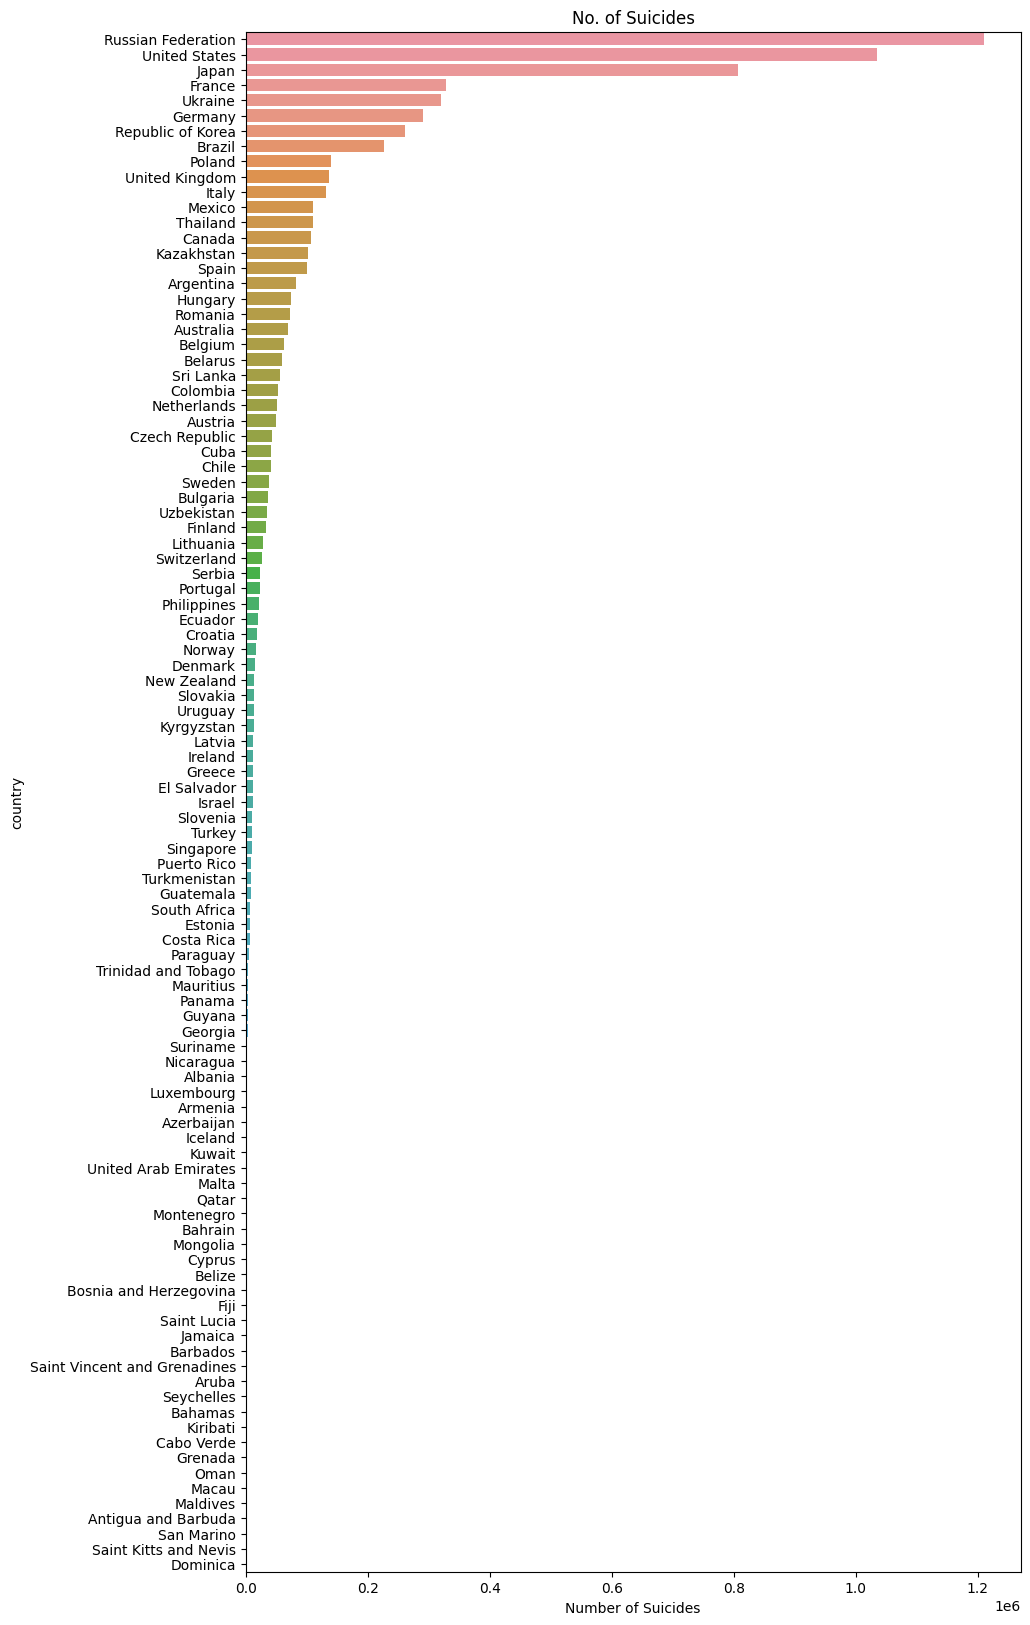

In [180]:
plt.figure(figsize=(10,20))
sns.barplot(y='country',x='suicides_no',data=total_suicide)
plt.title('No. of Suicides')
plt.xlabel('Number of Suicides')

Text(0.5, 0, 'Number of Suicides')

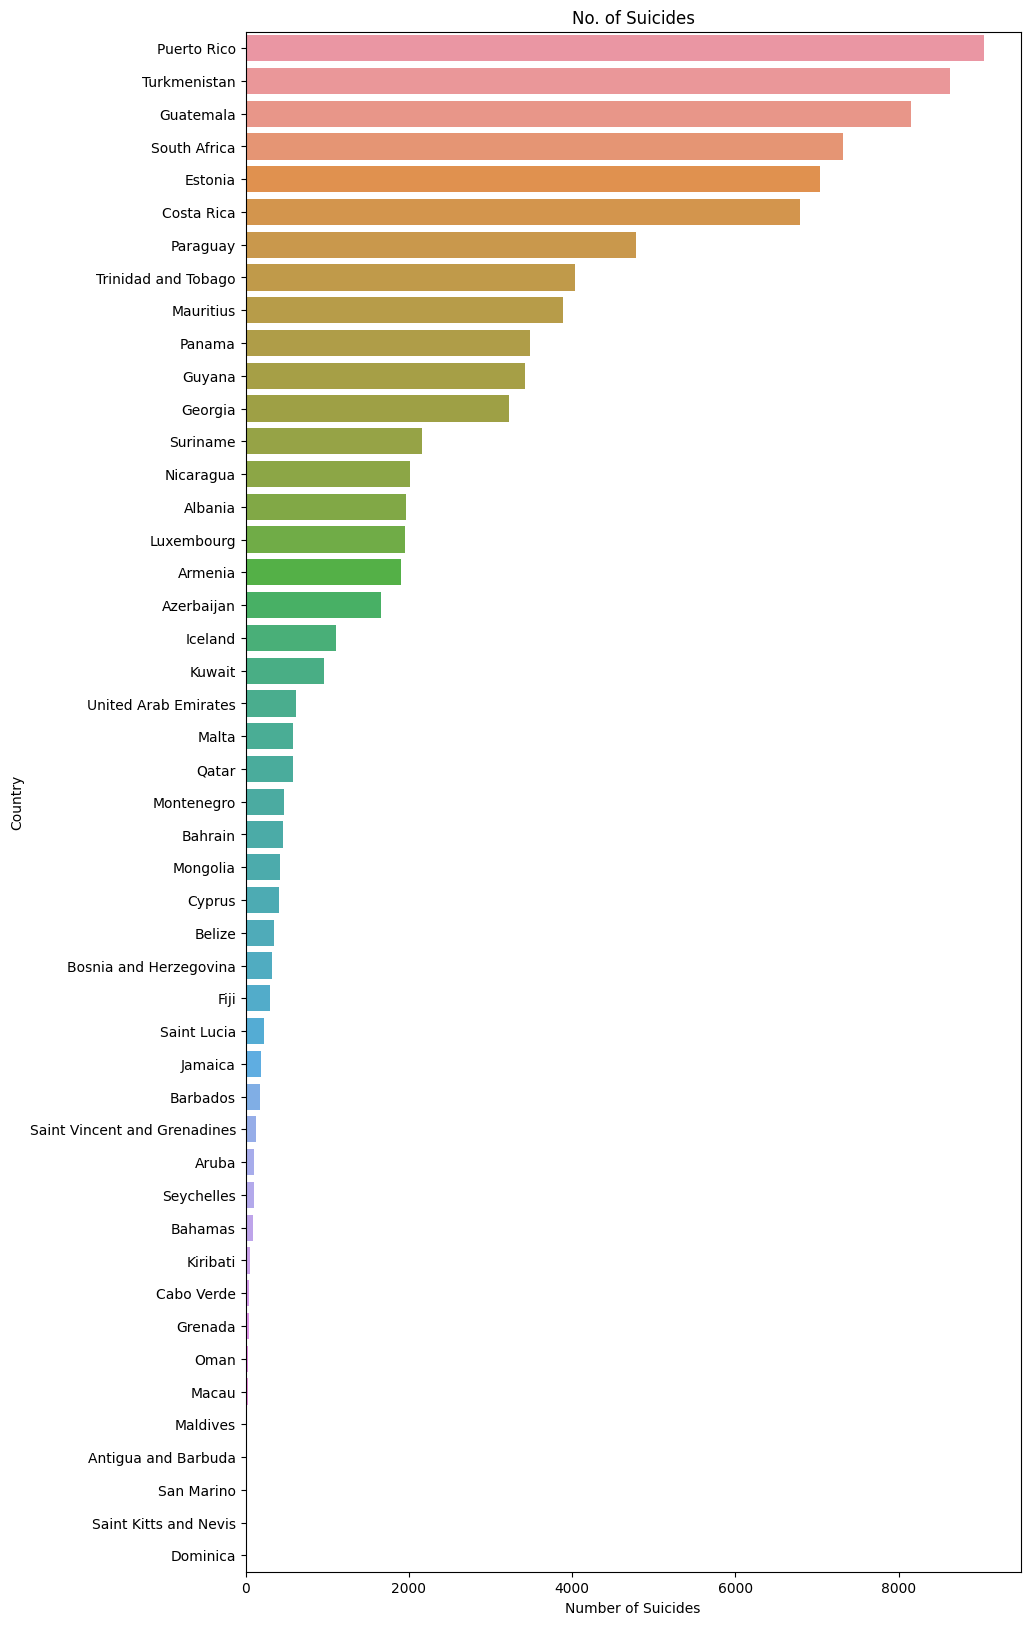

In [181]:
plt.figure(figsize=(10,20))
sns.barplot(y=total_suicide[total_suicide.suicides_no<10000].country,
           x=total_suicide[total_suicide.suicides_no<10000].suicides_no,
           data = total_suicide)

plt.title('No. of Suicides')
plt.ylabel('Country')
plt.xlabel('Number of Suicides')


In [182]:
#Number of Suicides By Gender
suicide_gender = pd.DataFrame(suicide.groupby(['country','sex']).suicides_no.sum())
suicide_gender = suicide_gender.reset_index()
suicide_gender.head()

,country,sex,suicides_no
0,Albania,female,693
1,Albania,male,1277
2,Antigua and Barbuda,female,1
3,Antigua and Barbuda,male,10
4,Argentina,female,18326


<Axes: xlabel='suicides_no', ylabel='country'>

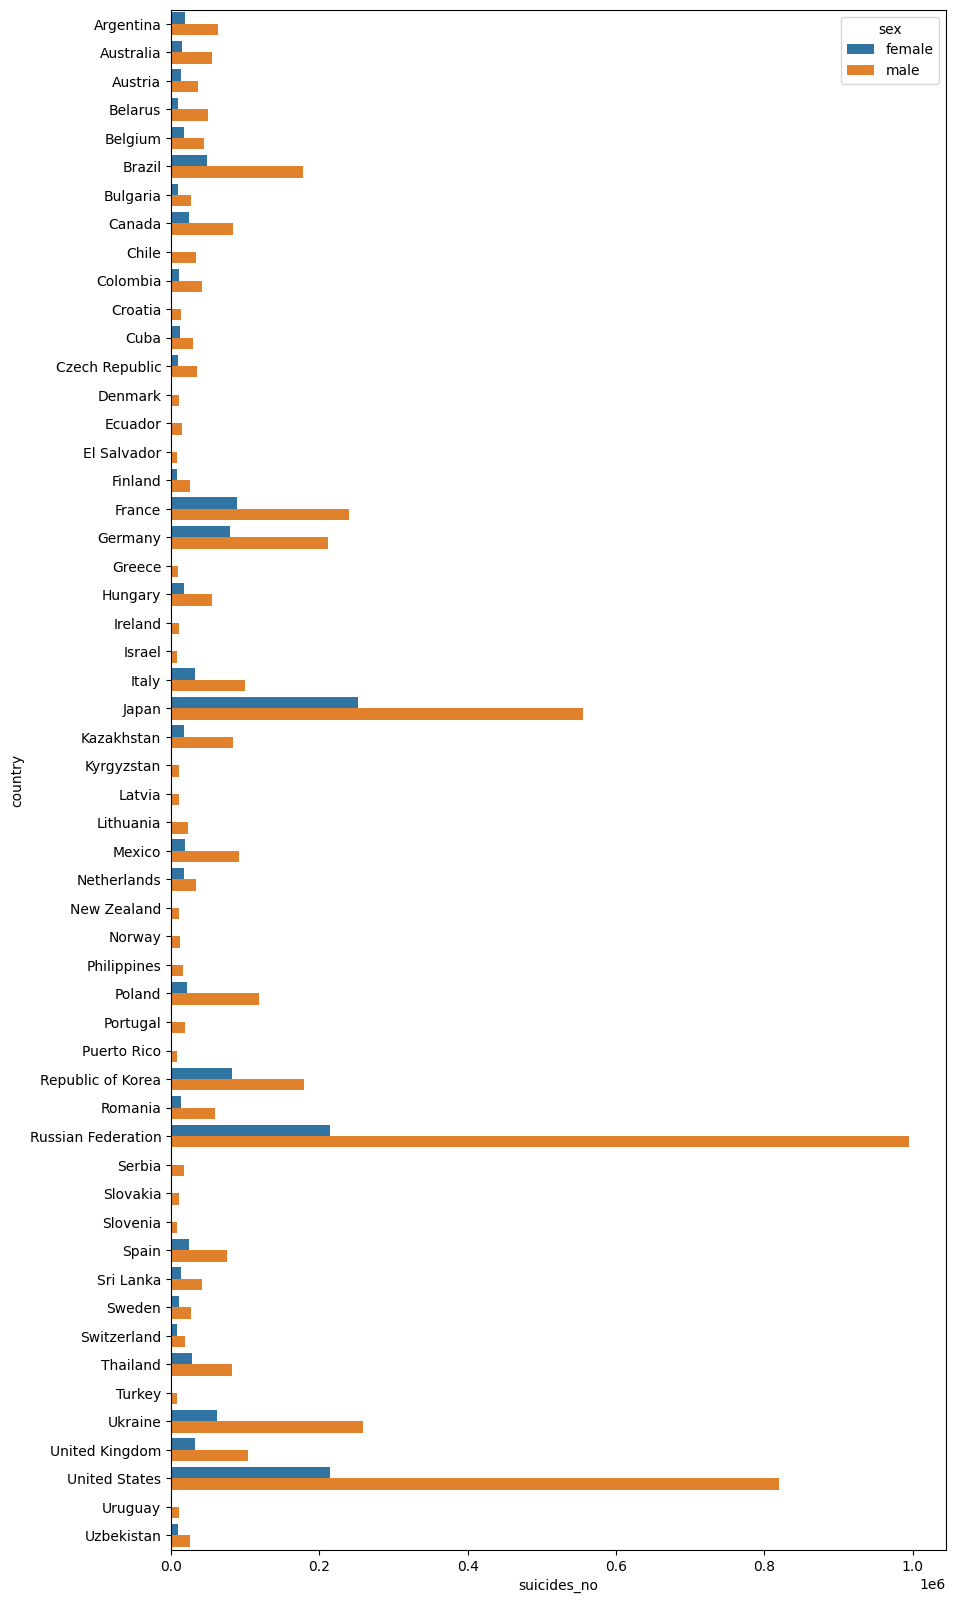

In [183]:
plt.figure(figsize=(10,20))
sns.barplot(x=suicide_gender[suicide_gender.suicides_no>7000].suicides_no,
            y=suicide_gender[suicide_gender.suicides_no>7000].country,
            data=suicide_gender,hue='sex')

<Axes: xlabel='suicides_no', ylabel='country'>

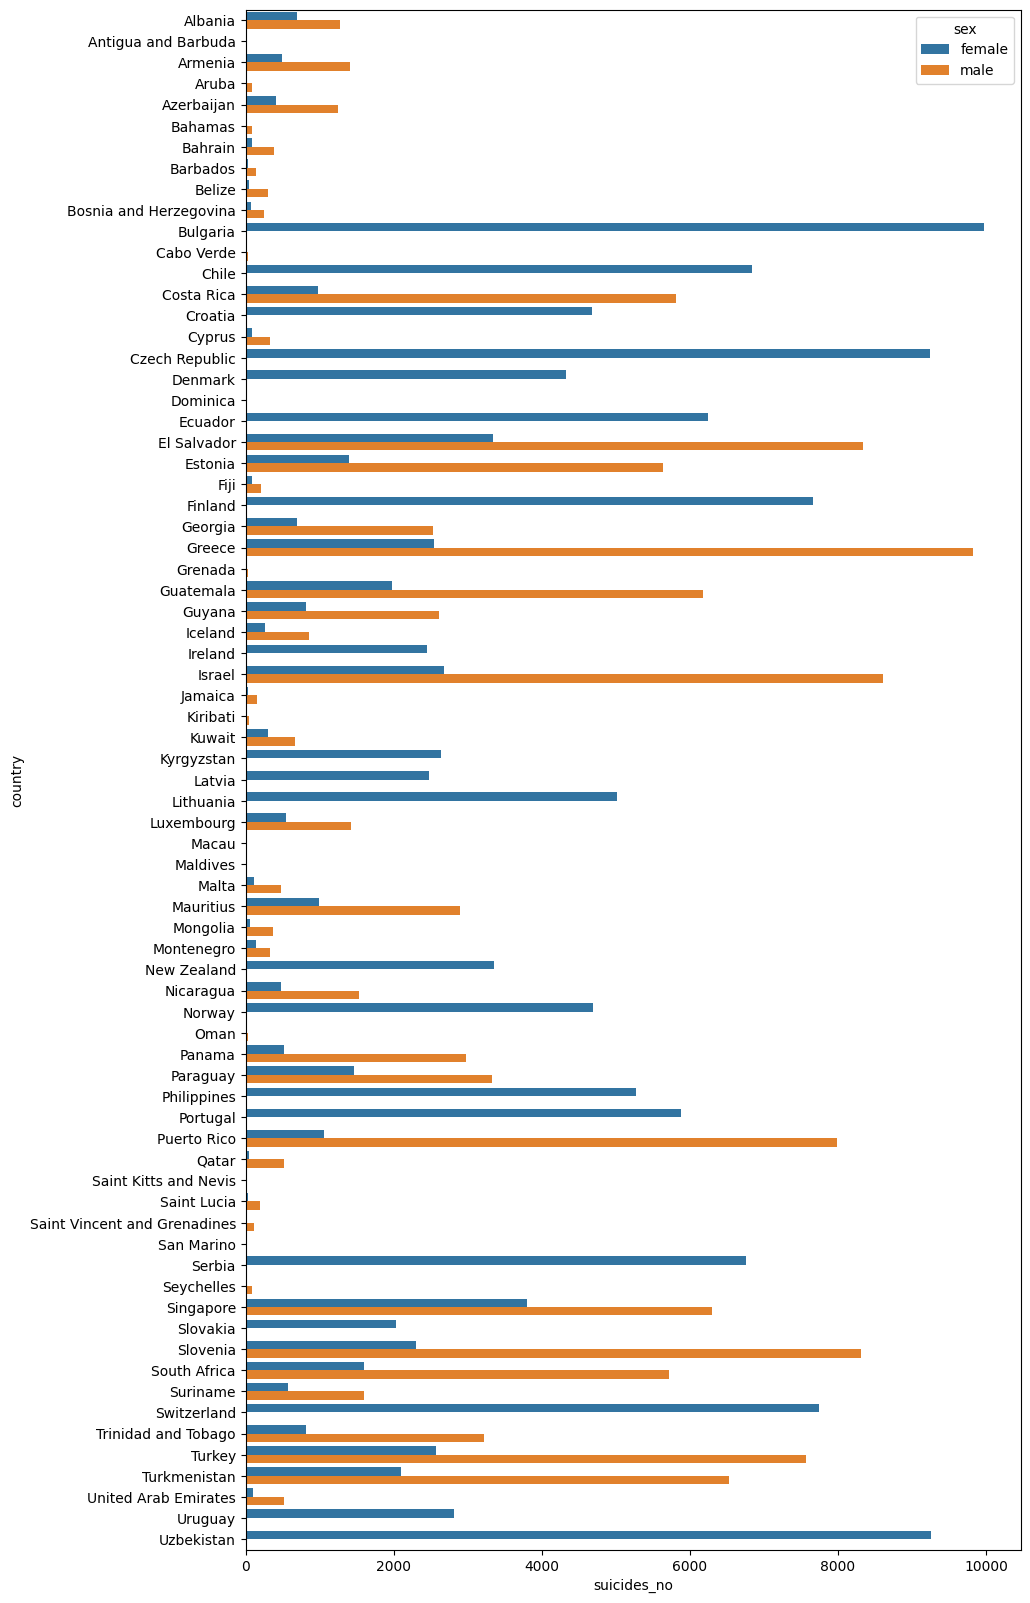

In [184]:
plt.figure(figsize=(10,20))
sns.barplot(x=suicide_gender[suicide_gender.suicides_no<10000].suicides_no,
        y=suicide_gender[suicide_gender.suicides_no<10000].country,
            data = suicide_gender,hue='sex')

In [185]:
suicide.groupby('sex').suicides_no.sum()

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

# Men are three(3) Times likely to commit more suicides than Women

In [ ]:
#Number of Suicides Globally
from bokeh.io import output_notebook, output_file, show
from bokeh.plotting import figure
output_notebook()
suicides_globally=suicide.groupby('year').sum().suicides_no.values
years=suicide.year.sort_values(ascending=True).unique()
p1 = figure(title='Suicides over the world')
p1.line(x=years,y=suicides_globally)
show(p1)

In [205]:
from bokeh.io import output_notebook, output_file, show
from bokeh.plotting import figure
output_notebook()
genders = suicide.groupby(['year','sex']).sum().suicides_no
female = genders.loc[:2015,'female'].values
male = genders.loc[:2015,'male'].values
years = suicide.year.sort_values(ascending=True).unique()
p2=figure(title='number of Suicides Gender Wise')
p2.line(x=years,y=male,color='red')
p2.line(x=years,y=female,color='green')
show(p2)

<ipython-input-205-0ba0934b3c3b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genders = suicide.groupby(['year','sex']).sum().suicides_no


Number of Suicides By Age

In [208]:
suicide.groupby('age').sum().suicides_no

<ipython-input-208-2a36fe0f363c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  suicide.groupby('age').sum().suicides_no


age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64

<ipython-input-216-77e61236c773>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  suicides_age = suicide.groupby('age').sum().suicides_no.values
<ipython-input-216-77e61236c773>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age = suicide.groupby('age').sum().reset_index().age.values


Text(0.5, 1.0, 'Number of Suicides by age')

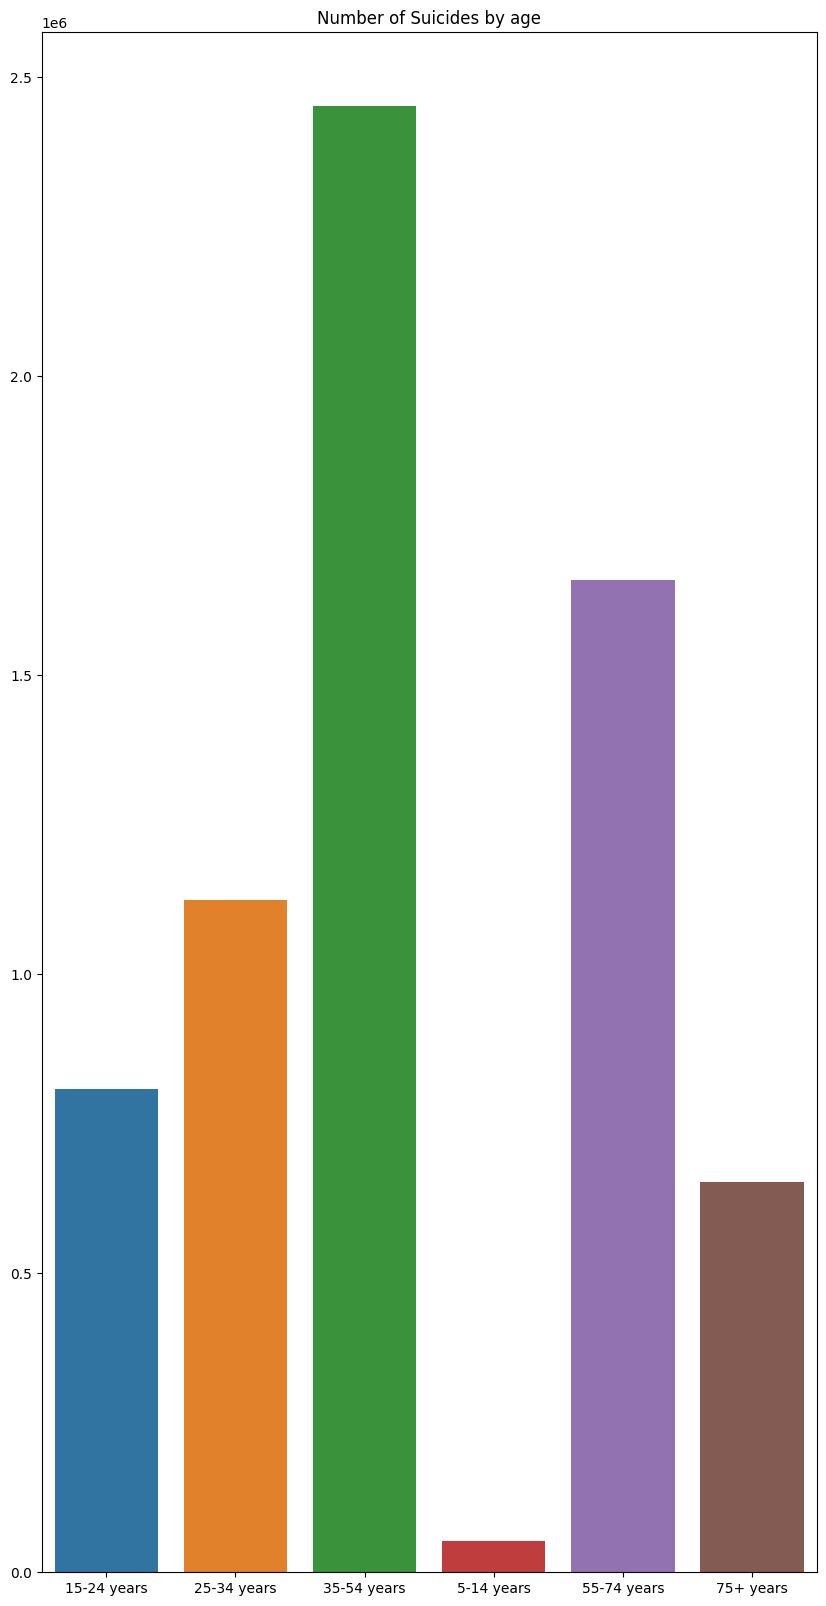

In [216]:
plt.figure(figsize=(10,20))
suicides_age = suicide.groupby('age').sum().suicides_no.values
age = suicide.groupby('age').sum().reset_index().age.values
sns.barplot(x=age,y=suicides_age)
plt.title('Number of Suicides by age')

People of the age in 35-54 years committed the most suicide.

Number of Suicides By Generation

In [218]:
suicide.groupby('generation').sum().suicides_no

<ipython-input-218-65e33adde2ad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  suicide.groupby('generation').sum().suicides_no


generation
Boomers            2284498
G.I. Generation     510009
Generation X       1532804
Generation Z         15906
Millenials          623459
Silent             1781744
Name: suicides_no, dtype: int64

<ipython-input-222-5e4ed43d7173>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  suicides_gen = suicide.groupby('generation').sum().suicides_no.values
<ipython-input-222-5e4ed43d7173>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  generations = suicide.groupby('generation').sum().suicides_no.reset_index().generation


Text(0.5, 0, 'Generation')

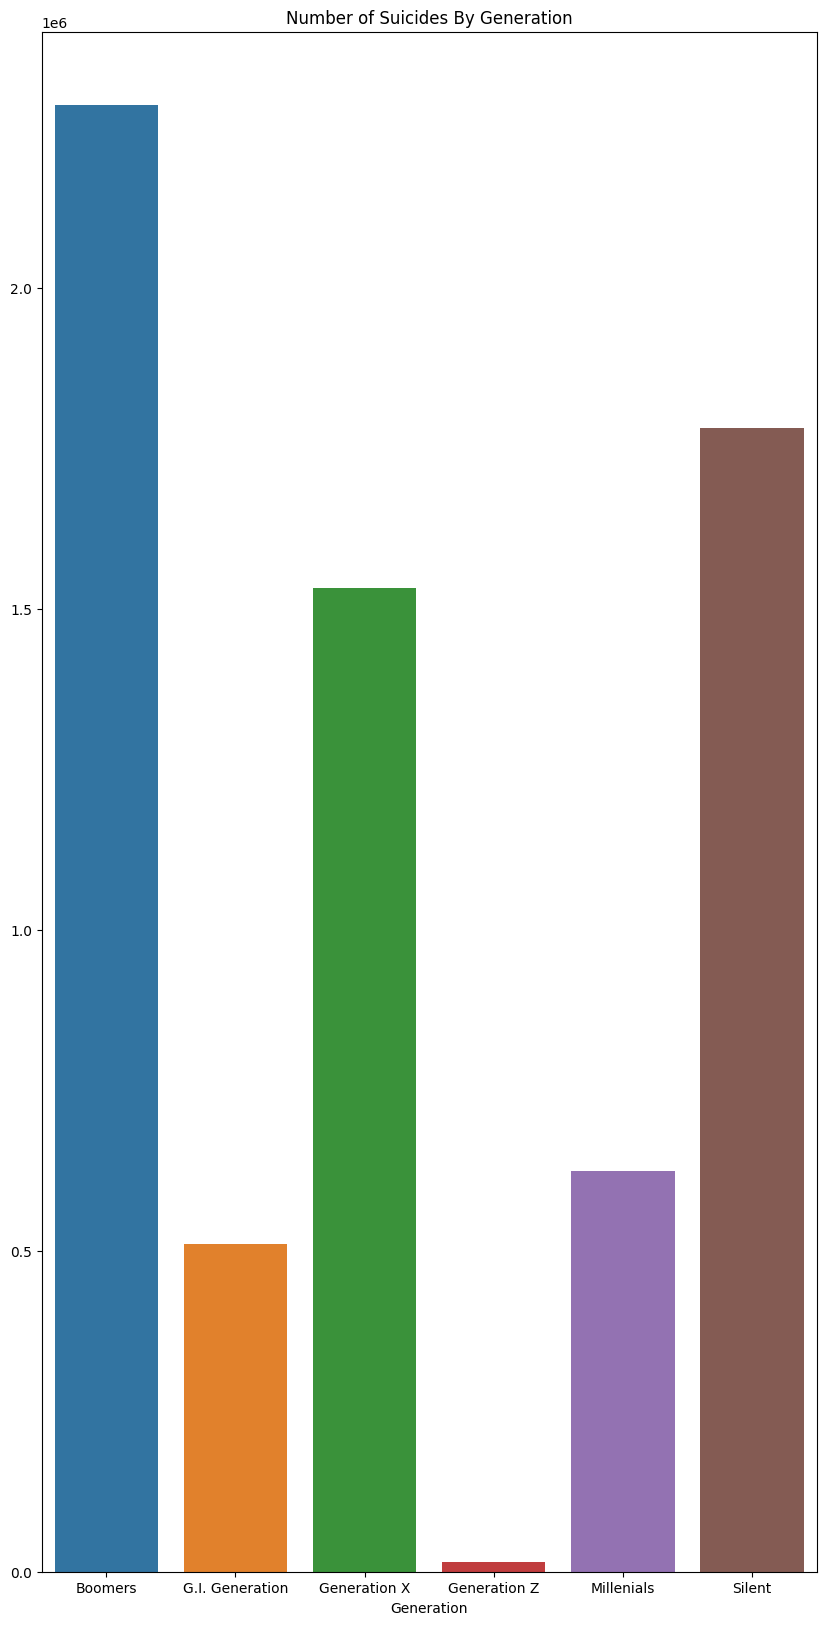

In [222]:
plt.figure(figsize=(10,20))
suicides_gen = suicide.groupby('generation').sum().suicides_no.values
generations = suicide.groupby('generation').sum().suicides_no.reset_index().generation
sns.barplot(x=generations,y=suicides_gen)
plt.title('Number of Suicides By Generation')
plt.xlabel('Generation')

Boomers committed the most suicide.

<ipython-input-223-25bbb8d29455>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(suicide.corr(),annot=True)


<Axes: >

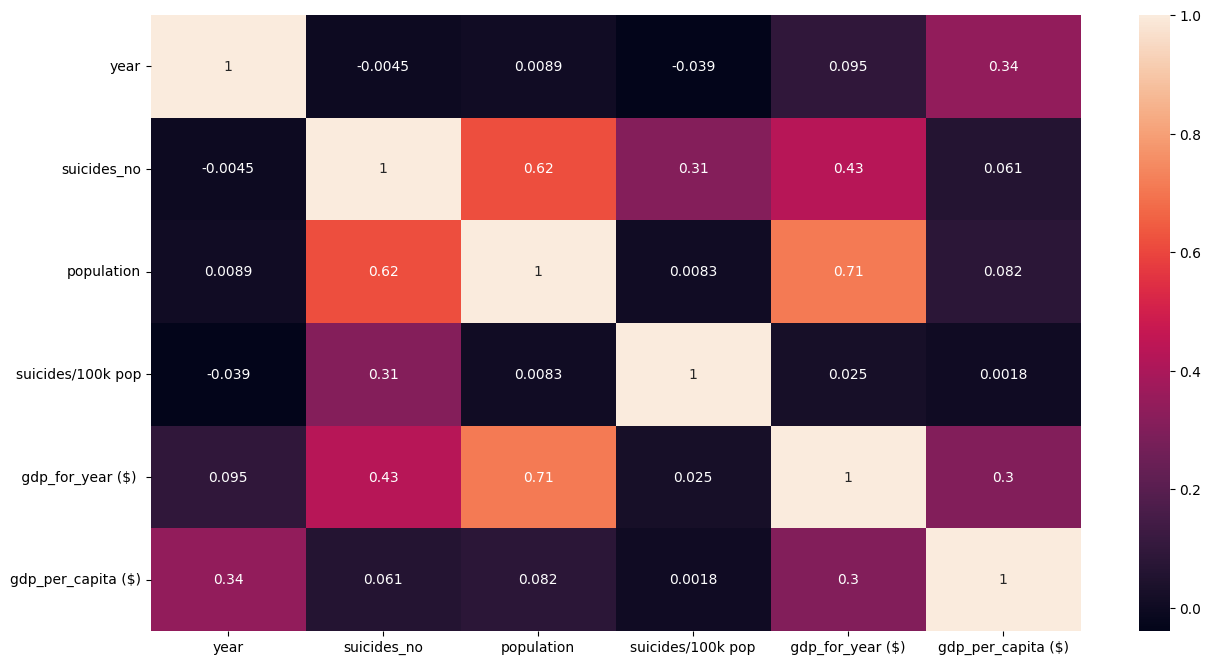

In [223]:
plt.figure(figsize=(15,8))
sns.heatmap(suicide.corr(),annot=True)

Some Economic Conclusions that we can infer from this is:
1.)gdp/year:- population. It's logical that if more people are there in the country GDP will be bigger, 0.71 it's a high correlation.
2.)suicides_no :- more people => more suicides